# CSE151A - PA2
By: Jonathan Lo<br>
Date: 7/15/23

## Overhead

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets

In [2]:
# Loading datasets
heart = pd.read_csv("heart.csv")
iris = datasets.load_iris()

def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

## Questions

### Q1a

In [3]:
# Split data
X = heart.iloc[:, :-1] 
y = heart.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=103, random_state=42)

# Fit model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Obtain top features & coefficients
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]
top_indicies = coefficients.argsort()[-3:][::-1]
for index in top_indicies:
    print(f"{X.columns[index]}: {coefficients[index]}")

cp: 0.8872255379320689
slope: 0.7493866390425106
restecg: 0.5001162623162402


### Q1b

In [4]:
# Get preds
y_pred = log_reg.predict(X_test)

# Get error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy
print(f"Test Error: {test_error:.2f}")

Test Error: 0.19


### Q1c

In [5]:
# Find cross val error
cross_val_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
cross_val_error = 1 - cross_val_scores.mean()
print(f"Test Error: {test_error:.2f}")
print(f"Cross-Validated Error: {cross_val_error:.2f}")

Test Error: 0.19
Cross-Validated Error: 0.16


The Cross-Validated error is smaller than the test error meaning that it will perform better if cross validated. However, the error difference (0.03) is relatively small so gains may be neglible and irrelevent in the face of scalability.

### Q2a

In [6]:
def pred_label(w, b, x):
    """ Preds label provided w: vector, b: real number, x: dataset
    """
    linear_combination = np.dot(w, x) + b
    predicted_label = np.sign(linear_combination)

    return int(predicted_label)

def perceptron(data, labels, threshold=1000):
    """ Runs the perceptron algo
    """
    # Init vars
    num_points, num_features = data.shape
    w = np.zeros(num_features)  
    b = 0  

    # Randomly permute
    permutation = np.random.permutation(num_points)
    data = data[permutation]
    labels = labels[permutation]

    # Perceptron algorithm
    for _ in range(threshold):
        misclassified = False

        for i in range(num_points):
            x = data[i]
            y = labels[i]

            # Update if misclassfied
            if y * (np.dot(w, x) + b) <= 0:
                w += y * x
                b += y
                misclassified = True

        # If no misclassified points break
        if not misclassified:
            break

    return w, b

### Q2b

In [7]:
# Massage data
data = iris.data
labels = iris.target

# Restrict data to features 1-3
data = data[:, [1, 3]]

# Massage to 1, -1
labels = np.where(labels == 0, -1, labels)
data = data[labels != 2]
labels = labels[labels != 2]

### Q2c

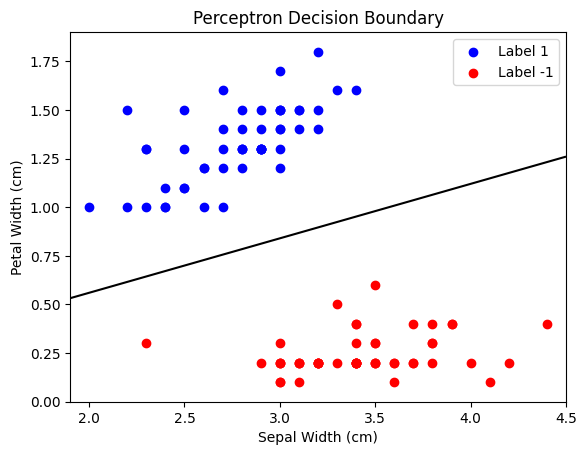

In [8]:
# Run Perceptron algo
w, b = perceptron(data, labels)

# Plot diff colors
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], color='blue', label='Label 1')
plt.scatter(data[labels == -1][:, 0], data[labels == -1][:, 1], color='red', label='Label -1')

# Plot decision boundary
x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors='black')

# General plot styling
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()

### Q2d

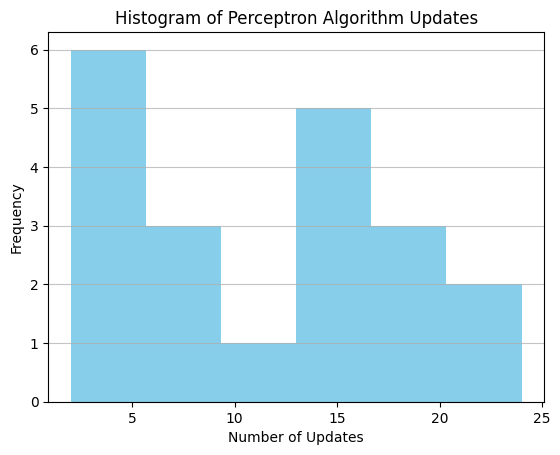

In [9]:
# Update function
def count_perceptron(data, labels, threshold=1000):
    """ Runs the perceptron algo
    """
    # Init vars
    num_points, num_features = data.shape
    w = np.zeros(num_features)  
    b = 0  

    # Randomly permute
    permutation = np.random.permutation(num_points)
    data = data[permutation]
    labels = labels[permutation]

    # Perceptron algorithm
    num_updates = 0
    for _ in range(threshold):
        misclassified = False

        for i in range(num_points):
            x = data[i]
            y = labels[i]

            # Update if misclassfied
            if y * (np.dot(w, x) + b) <= 0:
                w += y * x
                b += y
                misclassified = True
                
                num_updates += 1

        # If no misclassified points break
        if not misclassified:
            break
            

    return w, b, num_updates

# Run Perceptron 20 times
update_counts = []
for _ in range(20):
    _, _, num_updates = count_perceptron(data, labels)
    update_counts.append(num_updates)

# Plot the histogram 
plt.hist(update_counts, bins='auto', color='skyblue')
plt.xlabel('Number of Updates')
plt.ylabel('Frequency')
plt.title('Histogram of Perceptron Algorithm Updates')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Q3a

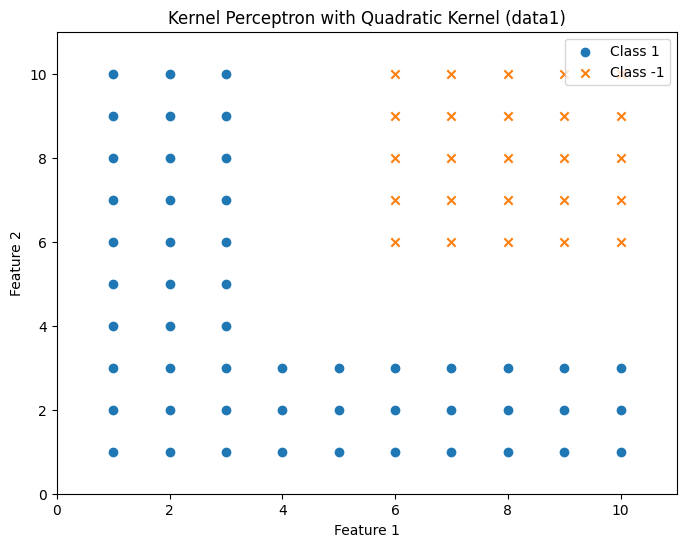

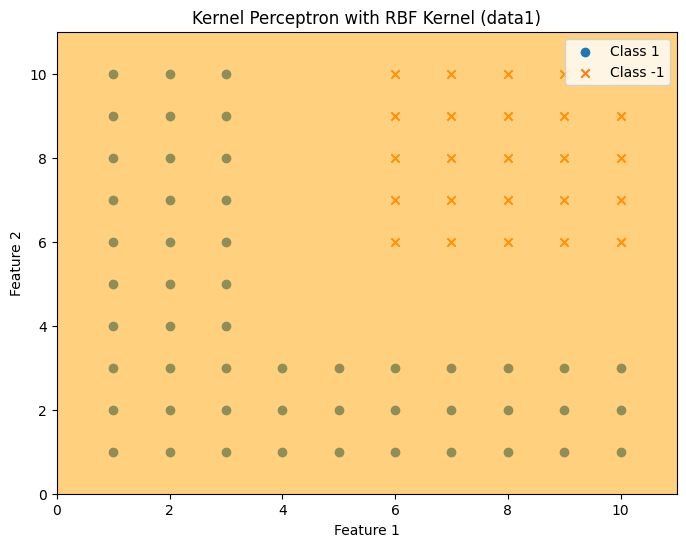

In [10]:
# Define Kernels
def quadratic_kernel_matrix(X):
    return np.dot(X, X.T) ** 2

def rbf_kernel_matrix(X, gamma=1.0):
    n_samples, _ = X.shape
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf_kernel(X[i], X[j], gamma)
    return K

def quadratic_kernel(x, X):
    return (1 + np.dot(X, x)) ** 2

def rbf_kernel(x, X, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(X - x) ** 2)

# Define Perceptron
def kernel_perceptron(K, y, max_iter=100):
    n_samples = K.shape[0]
    alpha = np.zeros(n_samples)

    for _ in range(max_iter):
        misclassified = 0
        for i in range(n_samples):
            prediction = np.sum(alpha * y * K[:, i])  # Modify this line
            if np.sign(prediction) != y[i]:
                alpha[i] += 1
                misclassified += 1

        if misclassified == 0:
            break

    return alpha

# Function to plot boundry
def plot_decision_boundary(X, y, alpha, kernel_func, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='x', label='Class -1')

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

    Z = np.zeros(xx1.shape)
    for i in range(xx1.shape[0]):
        for j in range(xx1.shape[1]):
            point = np.array([xx1[i, j], xx2[i, j]])
            Z[i, j] = np.sum(alpha * y * kernel_func(point, X))

    plt.contourf(xx1, xx2, Z, levels=[-1, 0, 1], colors=['orange', 'white', 'purple'], alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Special load proccess
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

data1_file = 'data1.txt'
X1, y1 = load_data(data1_file)

# Calculate the kernel matrices
K1_quadratic = quadratic_kernel_matrix(X1)
K1_rbf = rbf_kernel_matrix(X1)

# Apply Kernel Perceptron with quadratic kernel
alpha1_quadratic = kernel_perceptron(K1_quadratic, y1)
plot_decision_boundary(X1, y1, alpha1_quadratic, quadratic_kernel, title='Kernel Perceptron with Quadratic Kernel (data1)')

# Apply Kernel Perceptron with RBF kernel
alpha1_rbf = kernel_perceptron(K1_rbf, y1)
plot_decision_boundary(X1, y1, alpha1_rbf, rbf_kernel, title='Kernel Perceptron with RBF Kernel (data1)')

### Q3b

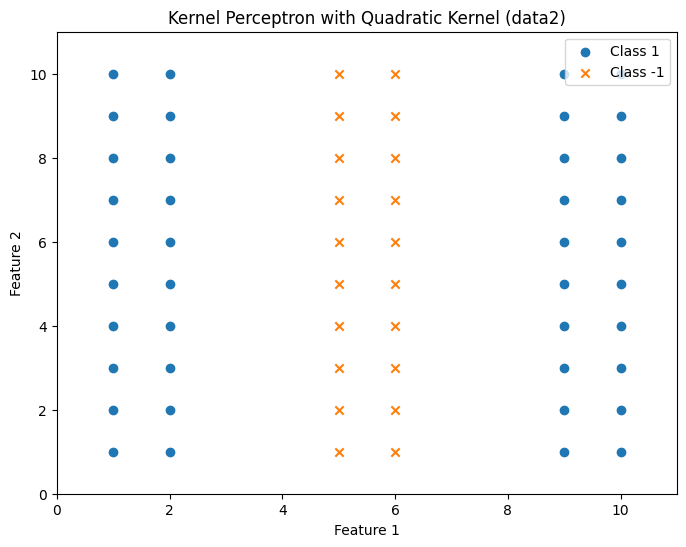

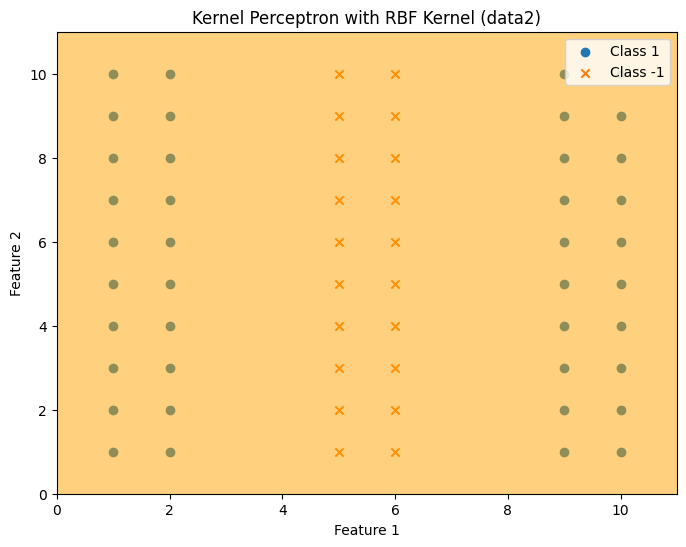

In [11]:
# Load for data2
data2_file = 'data2.txt'
X2, y2 = load_data(data2_file)

# Calculate the kernel matrices
K2_quadratic = quadratic_kernel_matrix(X2)
K2_rbf = rbf_kernel_matrix(X2)

# Apply Kernel Perceptron with quadratic kernel
alpha2_quadratic = kernel_perceptron(K2_quadratic, y2)
plot_decision_boundary(X2, y2, alpha2_quadratic, quadratic_kernel, title='Kernel Perceptron with Quadratic Kernel (data2)')

# Apply Kernel Perceptron with RBF kernel
alpha2_rbf = kernel_perceptron(K2_rbf, y2)
plot_decision_boundary(X2, y2, alpha2_rbf, rbf_kernel, title='Kernel Perceptron with RBF Kernel (data2)')